Please enter the path of you csv file:/home/skont/Desktop/pq_nomad.csv


<IPython.core.display.Javascript object>


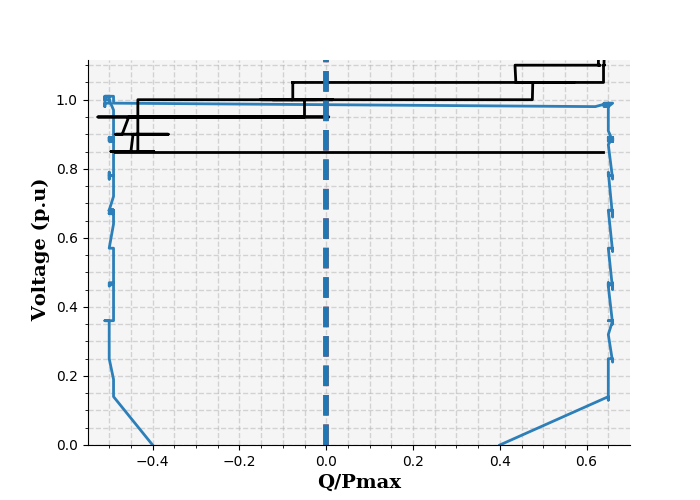

Text(0.5, 0, 'Q/Pmax')

In [2]:
from plot_maplot_v1 import *
import numpy as np
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)

p=[data['ppc:P0_Scaled'][i] for i in reversed(range(414))]
p=p+data['ppc:P0_Scaled'][414:].tolist()
q=[data['ppc:Q0_Scaled'][i] for i in reversed(range(414))]
q=q+data['ppc:Q0_Scaled'][414:].tolist()
p.append(0)
q.append(-0.4)
p= [0]+p
q=[0.4]+q
fig, ax = plt.subplots(figsize=(7,5))
l1 = ax.plot(q,p,label='V(Q)',linewidth=2,c='#2c7fb8')
ax.axvline(linewidth=4, ls='--',c='#de2d26')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('#000000')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


In [1]:
from plot_maplot_v1 import *
import numpy as np

csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)

Please enter the path of you csv file:/home/skont/Desktop/qv_nomad.csv


In [6]:
data

,ppc:Q0,avr:VSP0,ppc:Q0_Scaled,avr:VSP0_Scaled
0,12569.938,39675,0.628,1.15
1,12569.938,39675,0.628,1.15
2,12581.377,39675,0.629,1.15
3,12552.782,39675,0.628,1.15
4,12581.377,39675,0.629,1.15
...,...,...,...,...
986,-8440.960,29325,-0.422,0.85
987,-8784.089,29325,-0.439,0.85
988,-8692.588,29325,-0.435,0.85
989,-8681.149,29325,-0.434,0.85


<IPython.core.display.Javascript object>


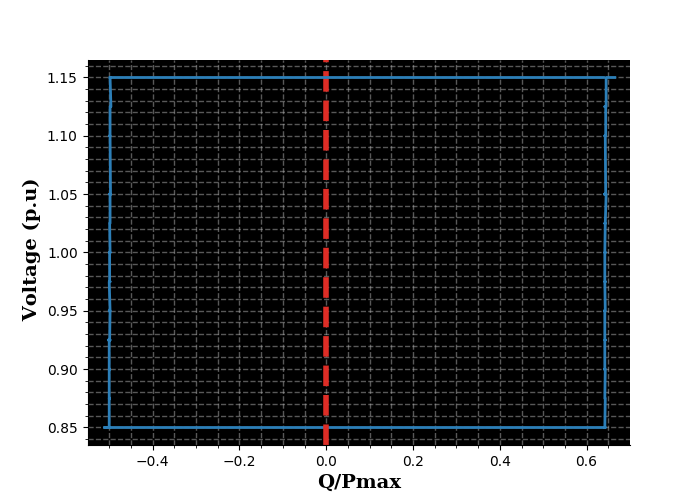

In [7]:
%matplotlib notebook
# fig, ax = plt.subplots(figsize=(5,5))
fig, ax = plt.subplots(figsize=(7,5))
l1 = ax.plot(data['ppc:Q0_Scaled'],data['avr:VSP0_Scaled'],label='V(Q)',linewidth=2,c='#2c7fb8')
ax.axvline(linewidth=4, ls='--',c='#de2d26')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('#000000')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
# ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel(' Voltage (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)
ax.axhline(y=1.15,xmin=0.045,xmax=0.95,linewidth=2, ls='-',c='#2c7fb8')

In [2]:
from plot_maplot_v1 import *
import numpy as np
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
def custom_plot(x,ys):
    lines=[]
    axes=[]
    fig, ax = plt.subplots(figsize=(10,5))
    axes.append(ax)
    
    for arg in ys:
        if arg["ax2"]==True:
            ax2 = ax.twinx()
            axes.append(ax2)
            break
    i=1
    j=1
    for arg in ys:
        if arg["ax2"]==False:
            l,=ax.plot(x,arg["tr"],label="Y1,"+str(i),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            i+=1
        else:
            l,=ax2.plot(x,arg["tr"],label="Y2,"+str(j),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            j+=1

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=True))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('X Label goes here',fontdict=font)
    ax.set_ylabel('Y1 label goes here',fontdict=font)
    
#     ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.05)
    if j > 1:
        ax2.spines["top"].set_visible(False)
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
        ax2.yaxis.set_minor_locator(AutoMinorLocator())
        ax2.set_ylabel('Y2 label goes here',fontdict=font)

    labs = [l.get_label() for l in lines]
    leg = axes[0].legend(lines,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lines),prop=legend_font,
                   fancybox=True, shadow=True)
    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        ax2.set_ylim(m,M)
    except:pass

    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        ax.set_ylim(m,M)
    except:pass
    fig.autofmt_xdate()
    return (fig,fig.axes,lines,leg)


Please enter the path of you csv file:/home/skont/Desktop/pq_nomad.csv


In [4]:
data

,"ppc:P0,ppc:Q0,ppc:P0_Scaled,ppc:Q0_Scaled"
0,"13685.106445,9441.750977,0.977507603214286,0.6..."
1,"13725.138672,9504.658203,0.980367048,0.6789041..."
2,"13776.606445,9464.625977,0.9840433175,0.676044..."
3,"13810.920898,9418.875977,0.986494349857143,0.6..."
4,"13816.638672,9413.157227,0.986902762285714,0.6..."
...,...
85,"12318.310547,9172.967773,0.879879324785714,0.6..."
86,"12352.625,9184.405273,0.882330357142857,0.6560..."
87,"12432.686523,9161.529297,0.888049037357143,0.6..."
88,"12444.125,9172.967773,0.888866071428571,0.6552..."


In [7]:
t

Series([], dtype: float64)

In [20]:
def get_data_from_csv(data_csv):
    try:
        data=pd.read_csv(data_csv,delimiter=" ")
        if data.columns[0]!='TIME':
            data=pd.read_csv(data_csv,delimiter=",")
        if data.columns[0]=='TIME':
            if "." in data['TIME'][0]:
                data['TIME']= data['TIME'].str.split(".",n=1,expand=True)[0]
            data['TIME']=data['TIME'].apply(lambda x : datetime.datetime.strptime(x, '%H:%M:%S'))
            
        data.replace("---",np.NaN,inplace=True)
        for col in data.select_dtypes('object').columns:
            try:
                data[col]=data[col].astype(float)
            except ValueError:
                continue
        data = data.round(3)
        
        return data
    except FileNotFoundError as e:
        print(e)
        return e

In [21]:
data=get_data_from_csv('/home/skont/Desktop/pq_nomad.csv')

In [22]:
data

,ppc:P0,ppc:Q0,ppc:P0_Scaled,ppc:Q0_Scaled
0,13685.106,9441.751,0.978,0.674
1,13725.139,9504.658,0.980,0.679
2,13776.606,9464.626,0.984,0.676
3,13810.921,9418.876,0.986,0.673
4,13816.639,9413.157,0.987,0.672
...,...,...,...,...
85,12318.311,9172.968,0.880,0.655
86,12352.625,9184.405,0.882,0.656
87,12432.687,9161.529,0.888,0.654
88,12444.125,9172.968,0.889,0.655
